**Reasoning**:
Load the data from "vgsales.csv" into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

df = pd.read_csv('vgsales.csv')
display(df.head())
print(df.shape)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,IND_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


(16598, 11)


Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
IND_Sales       float64
Global_Sales    float64
dtype: object
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
IND_Sales         0
Global_Sales      0
dtype: int64
Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
IND_Sales       0.000000
Global_Sales    0.000000
dtype: float64
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.

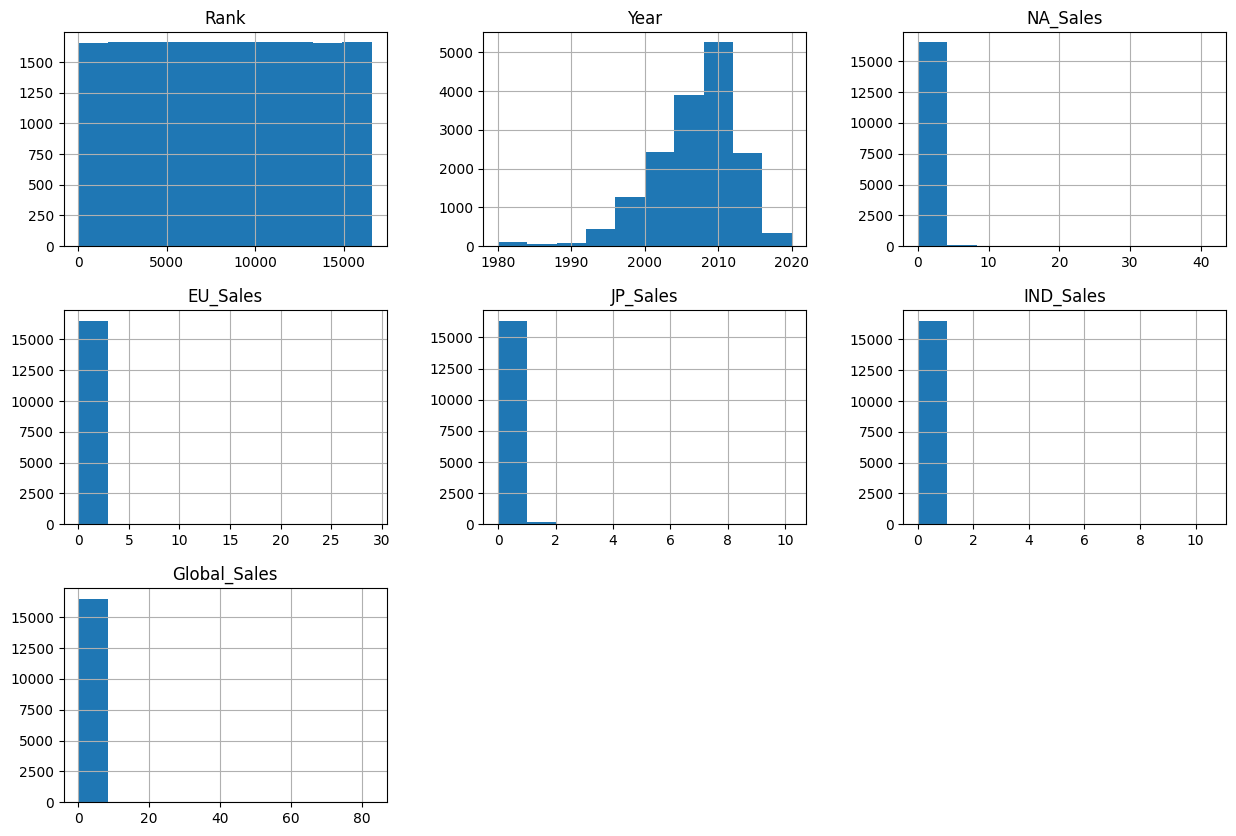


Unique values and frequencies for Platform:
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Unique values and frequencies for Genre:
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

Unique values and frequencies for Publisher:
Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                 

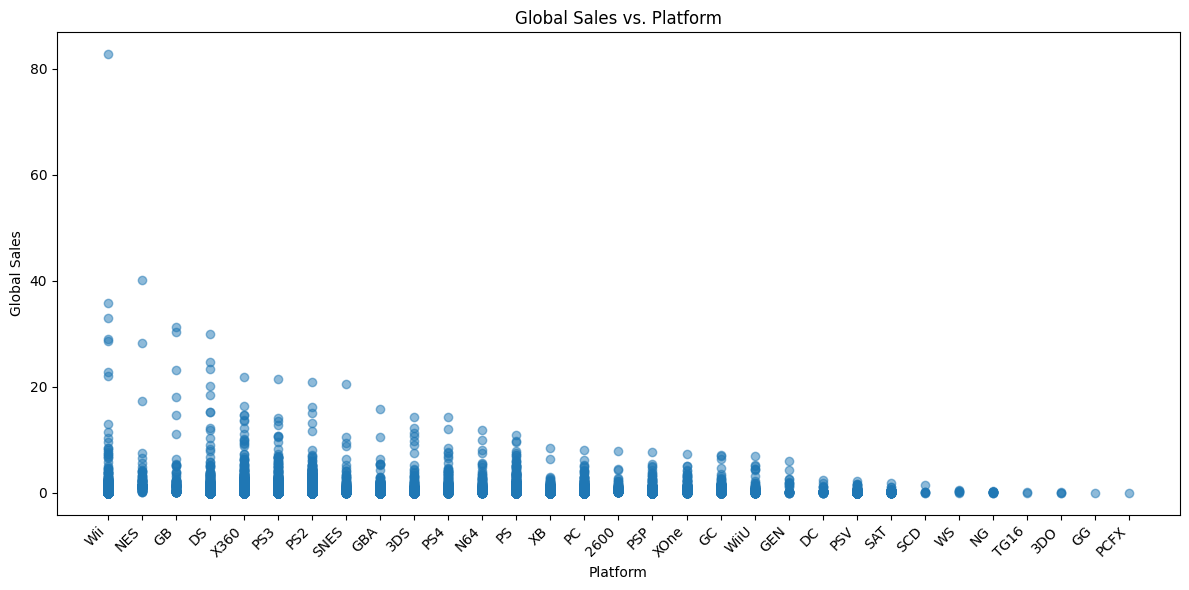

In [ ]:
# Examine data types
print(df.dtypes)

# Identify and quantify missing values
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

# Descriptive statistics for numerical columns
print(df.describe())

# Visualize distributions using histograms
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10))
plt.show()

# Analyze unique values and frequencies for categorical columns
for col in ['Platform', 'Genre', 'Publisher']:
    print(f"\nUnique values and frequencies for {col}:")
    print(df[col].value_counts())

# Explore relationships between sales and other features (example with Platform)
plt.figure(figsize=(12, 6))
plt.scatter(df['Platform'], df['Global_Sales'], alpha=0.5)  # Example: Global Sales vs. Platform
plt.xlabel("Platform")
plt.ylabel("Global Sales")
plt.title("Global Sales vs. Platform")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Fill missing 'Year' values with the median, replace missing 'Publisher' values with 'Unknown', winsorize 'Global_Sales', and convert the 'Year' column to integers. Then verify the cleaning by checking for missing values and displaying descriptive statistics.



Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
IND_Sales       0
Global_Sales    0
dtype: int64
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

          IND_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean 

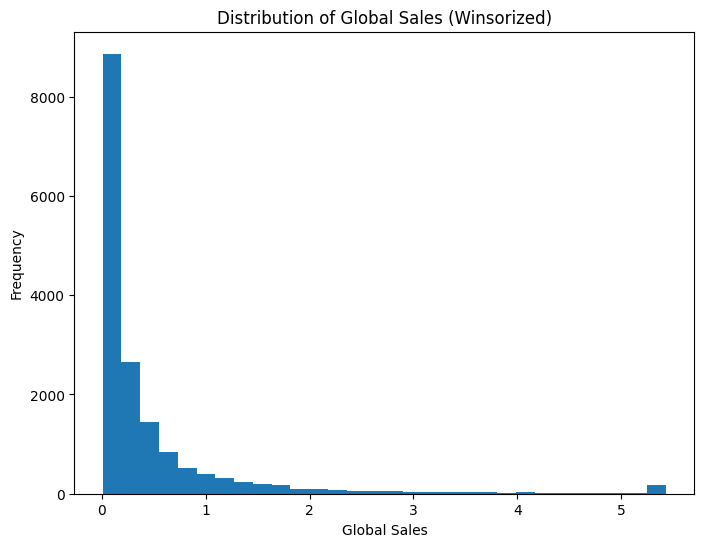

In [ ]:
# Fill missing 'Year' values with the median
median_year = df['Year'].median()
df['Year'] = df['Year'].fillna(median_year)

# Replace missing 'Publisher' values with 'Unknown'
df['Publisher'] = df['Publisher'].fillna('Unknown')

# Winsorize 'Global_Sales' at the 99th percentile
global_sales_99th = df['Global_Sales'].quantile(0.99)
df['Global_Sales'] = df['Global_Sales'].clip(upper=global_sales_99th)

# Convert 'Year' to integer
df['Year'] = df['Year'].astype(int)

# Verify the cleaning
print(df.isnull().sum())
print(df.describe())

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Global_Sales'], bins=30)
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales (Winsorized)')
plt.show()

## Feature engineering

### Subtask:
Engineer new features from existing ones to improve model performance.


**Reasoning**:
Create interaction terms, encode categorical features, and potentially explore other features as instructed.



In [ ]:
import pandas as pd

# Create interaction terms
df_engineered = df.copy()
df_engineered['Year_Genre'] = df_engineered['Year'].astype(str) + '_' + df_engineered['Genre']
df_engineered['Platform_Genre'] = df_engineered['Platform'] + '_' + df_engineered['Genre']

# Encode categorical features
categorical_cols = ['Platform', 'Genre', 'Publisher']
for col in categorical_cols:
    # Reduce dimensionality for 'Publisher' by dropping infrequent categories
    if col == 'Publisher':
        value_counts = df_engineered[col].value_counts()
        frequent_publishers = value_counts[value_counts >= 10].index
        df_engineered[col] = df_engineered[col].apply(lambda x: x if x in frequent_publishers else 'Other')

    dummies = pd.get_dummies(df_engineered[col], prefix=col)
    df_engineered = pd.concat([df_engineered, dummies], axis=1)
    df_engineered = df_engineered.drop(col, axis=1)

#Explore other potential features
df_engineered['Total_Regional_Sales'] = df_engineered['NA_Sales'] + df_engineered['EU_Sales'] + df_engineered['JP_Sales'] + df_engineered['IND_Sales']
df_engineered['NA_Sales_Ratio'] = df_engineered['NA_Sales'] / df_engineered['Global_Sales']
df_engineered['EU_Sales_Ratio'] = df_engineered['EU_Sales'] / df_engineered['Global_Sales']
df_engineered['JP_Sales_Ratio'] = df_engineered['JP_Sales'] / df_engineered['Global_Sales']
df_engineered['Other_Sales_Ratio'] = df_engineered['IND_Sales'] / df_engineered['Global_Sales']

display(df_engineered.head())

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,IND_Sales,Global_Sales,Year_Genre,Platform_Genre,...,Publisher_Xplosiv,Publisher_Yeti,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Total_Regional_Sales,NA_Sales_Ratio,EU_Sales_Ratio,JP_Sales_Ratio,Other_Sales_Ratio
0,1,Wii Sports,2006,41.49,29.02,3.77,8.46,5.4306,2006_Sports,Wii_Sports,...,False,False,False,False,False,82.74,7.640040,5.343793,0.694214,1.557839
1,2,Super Mario Bros.,1985,29.08,3.58,6.81,0.77,5.4306,1985_Platform,NES_Platform,...,False,False,False,False,False,40.24,5.354841,0.659227,1.254005,0.141789
2,3,Mario Kart Wii,2008,15.85,12.88,3.79,3.31,5.4306,2008_Racing,Wii_Racing,...,False,False,False,False,False,35.83,2.918646,2.371745,0.697897,0.609509
3,4,Wii Sports Resort,2009,15.75,11.01,3.28,2.96,5.4306,2009_Sports,Wii_Sports,...,False,False,False,False,False,33.00,2.900232,2.027400,0.603985,0.545059
4,5,Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,5.4306,1996_Role-Playing,GB_Role-Playing,...,False,False,False,False,False,31.38,2.075277,1.637020,1.881928,0.184142


## Data preparation

### Subtask:
Prepare the data for model training.


**Reasoning**:
Separate features and target variable, then scale numerical features using StandardScaler.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_engineered.drop('Global_Sales', axis=1)
y = df_engineered['Global_Sales']

# Identify numerical features for scaling
numerical_features = X.select_dtypes(include=['number']).columns

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,IND_Sales,Year_Genre,Platform_Genre,Platform_2600,...,Publisher_Xplosiv,Publisher_Yeti,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Total_Regional_Sales,NA_Sales_Ratio,EU_Sales_Ratio,JP_Sales_Ratio,Other_Sales_Ratio
14303,1.253289,Stacked with Daniel Negreanu,-0.071977,-0.287351,-0.290207,-0.251492,-0.254864,2006_Misc,PSP_Misc,False,...,False,False,False,False,False,-0.326129,1.511254,-0.901598,-0.605516,-0.786608
13455,1.076108,National Geographic Panda (US sales),0.273954,-0.275106,-0.290207,-0.251492,-0.254864,2008_Simulation,DS_Simulation,False,...,False,False,False,False,False,-0.319698,1.511254,-0.901598,-0.605516,-0.786608
6724,-0.328610,Yakuza Zero: The Place of Oath,1.484709,-0.324086,-0.290207,0.556834,-0.254864,2015_Action,PS3_Action,False,...,False,False,False,False,False,-0.184659,-1.291549,-0.901598,1.878053,-0.786608
898,-1.544460,The Sims: Makin' Magic,-0.590872,0.937151,1.292898,-0.251492,0.222380,2003_Simulation,PC_Simulation,False,...,False,False,False,False,False,0.889224,0.212038,0.715289,-0.605516,-0.224305
8484,0.038691,Lufia: Curse of the Sinistrals,0.619884,-0.177146,-0.290207,-0.154493,-0.201837,2010_Role-Playing,DS_Role-Playing,False,...,False,False,False,False,False,-0.242533,0.810553,-0.901598,-0.139847,-0.036871


,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,IND_Sales,Year_Genre,Platform_Genre,Platform_2600,...,Publisher_Xplosiv,Publisher_Yeti,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Total_Regional_Sales,NA_Sales_Ratio,EU_Sales_Ratio,JP_Sales_Ratio,Other_Sales_Ratio
8928,0.131351,F1 2012,0.965814,-0.311841,-0.072530,-0.251492,-0.095783,2012_Racing,PC_Racing,False,...,False,False,False,False,False,-0.248964,-1.104695,1.944124,-0.605516,1.612551
4789,-0.732433,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",0.100988,0.067755,-0.211052,-0.219159,-0.042756,2007_Action,PS3_Action,False,...,False,False,False,False,False,-0.081772,0.950693,-0.513545,-0.543427,0.412972
15492,1.501425,Commandos 3: Destination Berlin,-0.590872,-0.324086,-0.250629,-0.251492,-0.254864,2003_Strategy,PC_Strategy,False,...,False,False,False,False,False,-0.332559,-1.291549,2.978932,-0.605516,-0.786608
14767,1.350122,The Sims 2: Bon Voyage,0.100988,-0.311841,-0.270418,-0.251492,-0.254864,2007_Simulation,PC_Simulation,False,...,False,False,False,False,False,-0.332559,-0.357281,0.391912,-0.605516,-0.786608
5211,-0.644364,Guitar Hero: Smash Hits,0.446919,-0.079185,-0.072530,-0.251492,0.010271,2009_Misc,PS3_Misc,False,...,False,False,False,False,False,-0.113924,0.265564,0.284119,-0.605516,0.879475


(13278, 210) (3320, 210) (13278,) (3320,)


## Model training

### Subtask:
Train a linear regression model.


**Reasoning**:
Train a linear regression model using the training data and make predictions on the test data.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop the non-numerical columns that were created
X = df_engineered.drop(['Global_Sales', 'Name', 'Year_Genre', 'Platform_Genre'], axis=1)
y = df_engineered['Global_Sales']

# Identify numerical features for scaling
numerical_features = X.select_dtypes(include=['number']).columns

# Scale numerical features using StandardScaler
scaler = StandardScaler()
# Use .loc to avoid SettingWithCopyWarning and ensure operation is on the DataFrame X
X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

<ipython-input-12-f3eda3bd3588>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.73207602 -1.73186733 -1.73165863 ...  1.7316147   1.73182339
  1.73203209]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])
<ipython-input-12-f3eda3bd3588>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.07197676 -3.70424462  0.27395352 ...  0.27395352  0.61988379
 -0.59087217]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,IND_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,...,Publisher_Xplosiv,Publisher_Yeti,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Total_Regional_Sales,NA_Sales_Ratio,EU_Sales_Ratio,JP_Sales_Ratio,Other_Sales_Ratio
14303,1.253289,-0.071977,-0.287351,-0.290207,-0.251492,-0.254864,False,False,False,False,...,False,False,False,False,False,-0.326129,1.511254,-0.901598,-0.605516,-0.786608
13455,1.076108,0.273954,-0.275106,-0.290207,-0.251492,-0.254864,False,False,False,False,...,False,False,False,False,False,-0.319698,1.511254,-0.901598,-0.605516,-0.786608
6724,-0.328610,1.484709,-0.324086,-0.290207,0.556834,-0.254864,False,False,False,False,...,False,False,False,False,False,-0.184659,-1.291549,-0.901598,1.878053,-0.786608
898,-1.544460,-0.590872,0.937151,1.292898,-0.251492,0.222380,False,False,False,False,...,False,False,False,False,False,0.889224,0.212038,0.715289,-0.605516,-0.224305
8484,0.038691,0.619884,-0.177146,-0.290207,-0.154493,-0.201837,False,False,False,False,...,False,False,False,False,False,-0.242533,0.810553,-0.901598,-0.139847,-0.036871


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,IND_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,...,Publisher_Xplosiv,Publisher_Yeti,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Total_Regional_Sales,NA_Sales_Ratio,EU_Sales_Ratio,JP_Sales_Ratio,Other_Sales_Ratio
8928,0.131351,0.965814,-0.311841,-0.072530,-0.251492,-0.095783,False,False,False,False,...,False,False,False,False,False,-0.248964,-1.104695,1.944124,-0.605516,1.612551
4789,-0.732433,0.100988,0.067755,-0.211052,-0.219159,-0.042756,False,False,False,False,...,False,False,False,False,False,-0.081772,0.950693,-0.513545,-0.543427,0.412972
15492,1.501425,-0.590872,-0.324086,-0.250629,-0.251492,-0.254864,False,False,False,False,...,False,False,False,False,False,-0.332559,-1.291549,2.978932,-0.605516,-0.786608
14767,1.350122,0.100988,-0.311841,-0.270418,-0.251492,-0.254864,False,False,False,False,...,False,False,False,False,False,-0.332559,-0.357281,0.391912,-0.605516,-0.786608
5211,-0.644364,0.446919,-0.079185,-0.072530,-0.251492,0.010271,False,False,False,False,...,False,False,False,False,False,-0.113924,0.265564,0.284119,-0.605516,0.879475


(13278, 207) (3320, 207) (13278,) (3320,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Drop the non-numerical columns before training
# Use errors='ignore' to prevent KeyError if a column is not found
X_train = X_train.drop(['Name', 'Year_Genre', 'Platform_Genre'], axis=1, errors='ignore')
X_test = X_test.drop(['Name', 'Year_Genre', 'Platform_Genre'], axis=1, errors='ignore')

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
X_train = X_train.drop(['Platform_Genre'], axis=1)
X_test = X_test.drop(['Platform_Genre'], axis=1)

from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the linear regression model.


**Reasoning**:
Evaluate the linear regression model using R-squared, MSE, and RMSE.  Print the evaluation metrics, coefficients, and intercept.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Print the model's coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

R-squared: 0.7858504526044883
Mean Squared Error (MSE): 0.16817656536348738
Root Mean Squared Error (RMSE): 0.4100933617647174
Coefficients: [-2.04856857e-01 -1.33580921e-02  3.43962747e-01  2.90537213e-01
  1.00168656e-01  9.93054883e-02 -3.19322058e-02  2.77555756e-16
  2.03088224e-02 -2.99979248e-02  1.09504346e-03 -8.32454532e-02
 -1.03678780e-02 -2.09942326e-02  1.32517273e-01  4.70176721e-02
 -1.62727906e-03  9.55945422e-02 -6.53476178e-02  2.89789780e-03
  6.50059908e-02  1.09645454e-03  1.49170347e-02  1.14657245e-02
  4.47072943e-02  1.79202716e-02  1.21215727e-02 -6.21484814e-02
 -7.65552038e-02 -2.66118596e-03 -1.37476904e-02 -9.70045374e-02
 -7.00786678e-03  1.48228061e-02  2.08394731e-02 -4.04222525e-02
  4.07319364e-02  2.18732384e-03  1.77178141e-02  1.58924958e-02
 -5.75892280e-03  9.29405139e-03 -6.33578727e-03 -6.73320538e-03
 -9.81286975e-04  1.00186358e-02 -5.97691548e-03 -1.14258033e-02
 -1.78983997e-02 -1.05055419e-02 -2.53441589e-02  9.18694825e-02
  1.78302111e-

Columns in df: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'IND_Sales', 'Global_Sales']


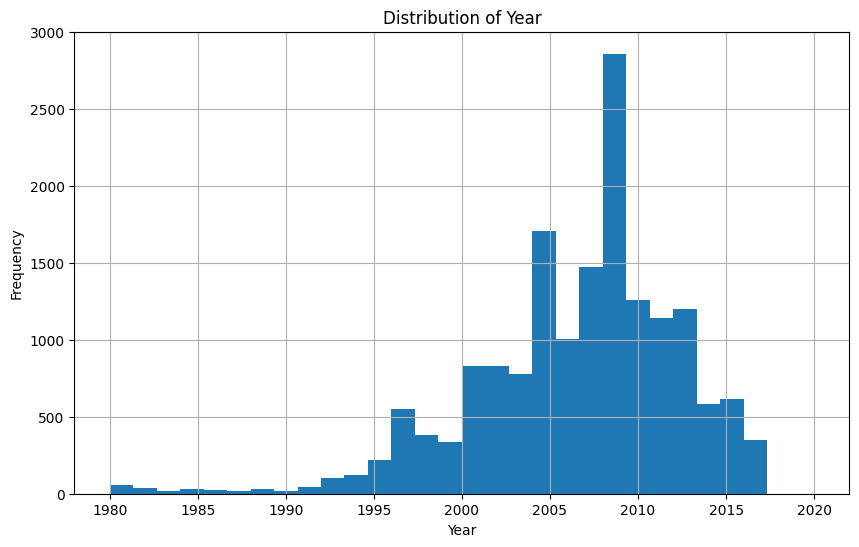

Error: One or more columns in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'] are not found in the DataFrame.


<Figure size 1500x800 with 0 Axes>

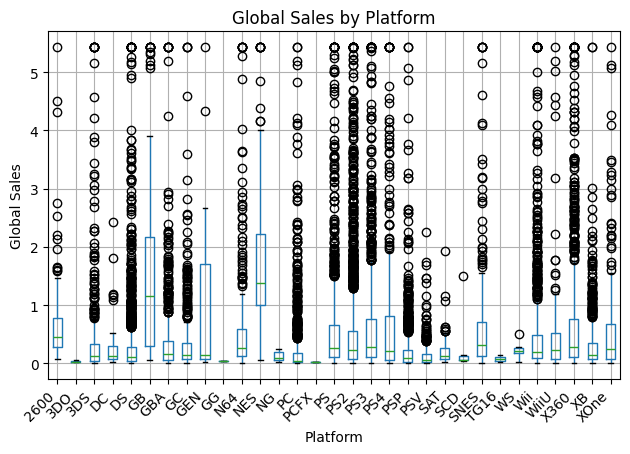

<Figure size 1500x800 with 0 Axes>

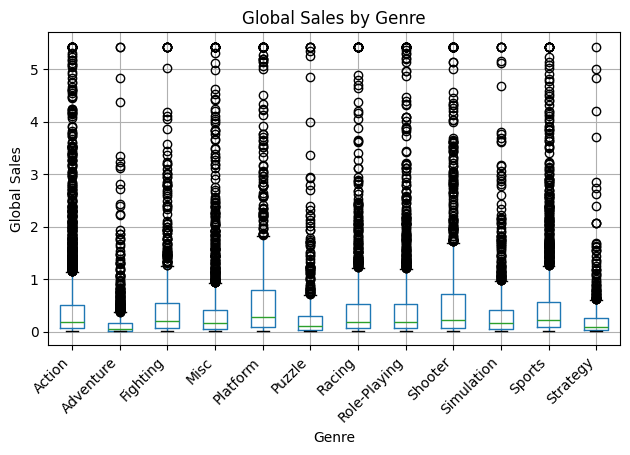

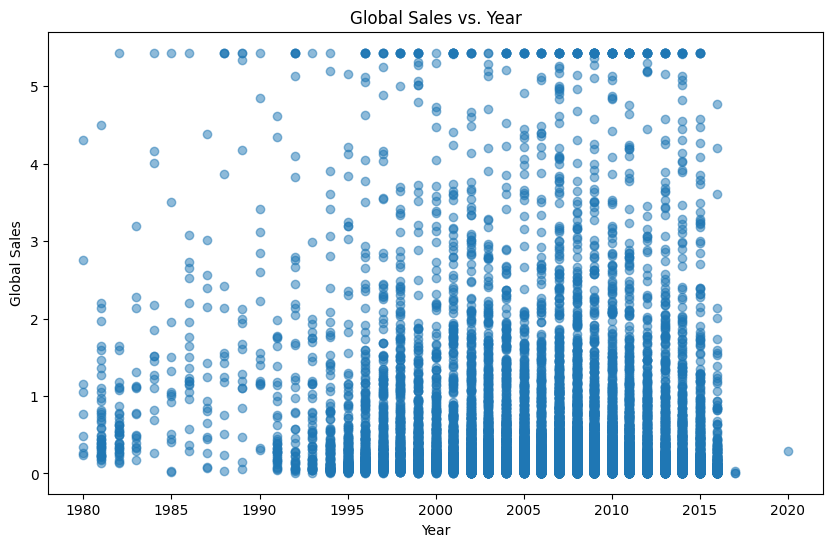

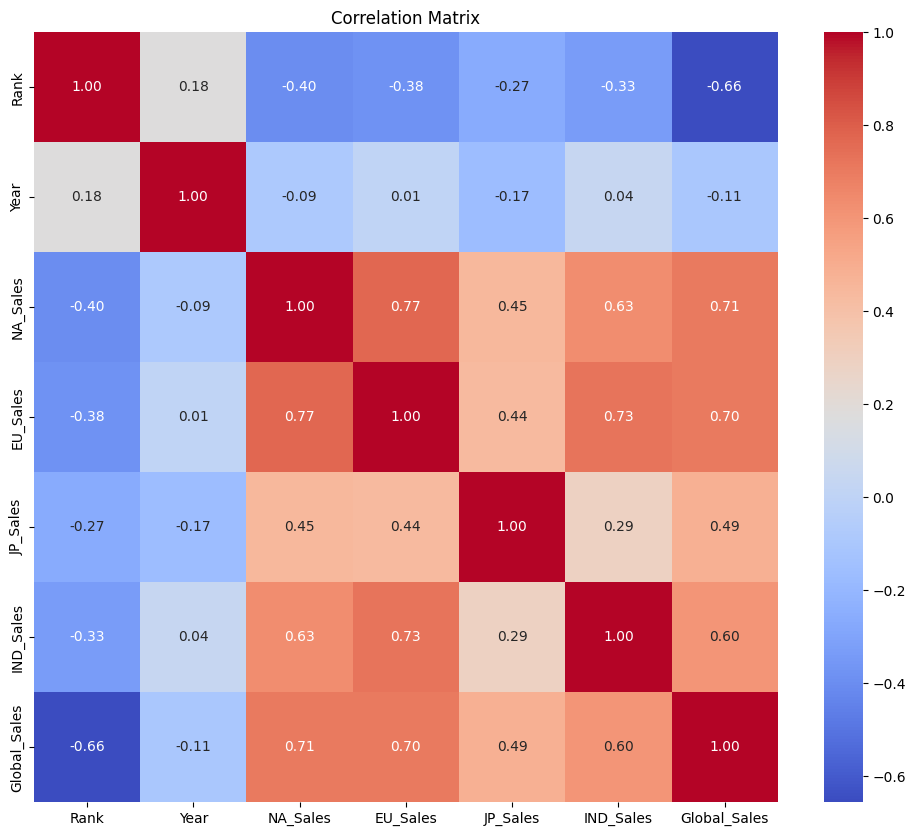

In [ ]:
# Additional plots for data visualization

# Explicitly check the columns of df before plotting
print("Columns in df:", df.columns.tolist())

# Distribution of 'Year'
import matplotlib.pyplot as plt # Ensure matplotlib is imported

plt.figure(figsize=(10, 6))
df['Year'].hist(bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')
plt.show()

# Distribution of 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# Check if all columns in sales_cols are in df.columns before plotting
if all(col in df.columns for col in sales_cols):
    df[sales_cols].hist(figsize=(15, 10), bins=30)
    plt.suptitle('Distribution of Regional Sales', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print(f"Error: One or more columns in {sales_cols} are not found in the DataFrame.")


# Box plot of Global Sales by Platform
plt.figure(figsize=(15, 8))
df.boxplot(column='Global_Sales', by='Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.title('Global Sales by Platform')
plt.xticks(rotation=45, ha="right")
plt.suptitle('') # Suppress the default title
plt.tight_layout()
plt.show()

# Box plot of Global Sales by Genre
plt.figure(figsize=(15, 8))
df.boxplot(column='Global_Sales', by='Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Global Sales by Genre')
plt.xticks(rotation=45, ha="right")
plt.suptitle('') # Suppress the default title
plt.tight_layout()
plt.show()

# Scatter plot of Global Sales vs. Year
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Global_Sales'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Global Sales vs. Year')
plt.show()

# Correlation matrix heatmap
import seaborn as sns # Ensure seaborn is imported

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Summary:

### Q&A
* **What is the R-squared value of the trained linear regression model?**  Approximately 0.7859. This suggests the model explains about 78.59% of the variance in the target variable (Global Sales).
* **What are the key steps in the data preprocessing and feature engineering process?** The process involved handling missing values (filling in missing 'Year' values with the median and replacing missing 'Publisher' values with 'Unknown'), winsorizing outliers in 'Global\_Sales', creating interaction terms ('Year\_Genre', 'Platform\_Genre'), one-hot encoding categorical variables ('Platform', 'Genre', 'Publisher'), and generating additional features (total regional sales, regional sales ratios).  Numerical features were also scaled using StandardScaler.

### Data Analysis Key Findings
* **Missing Value Imputation:** Missing 'Year' values were filled with the median year (2007), and missing 'Publisher' values were replaced with 'Unknown'.
* **Outlier Handling:** 'Global\_Sales' outliers were capped at the 99th percentile (approximately 5.43).
* **Feature Engineering:** Interaction terms combining 'Year' and 'Genre', and 'Platform' and 'Genre', were created. Categorical features were one-hot encoded, with infrequent publishers grouped into an 'Other' category.  Additional features included total regional sales and sales ratios.
* **Model Performance:** The linear regression model achieved an R-squared of approximately 0.7859, an MSE of 0.1682, and an RMSE of 0.4101.

### Insights or Next Steps
* **Feature Importance Analysis:** Analyze feature importance to understand which variables are most influential in predicting global sales and potentially simplify the model.
* **Alternative Models:** Explore other regression models (e.g., Random Forest, Gradient Boosting) to see if they can improve predictive performance beyond the linear model.
